# genetic algorithm

In [9]:
import pickle
#from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
train='./small/AD-S1.csv'
#train='./Aalto_BIG_train_IoTDevID.csv'
vali='./small/DI-S1.csv'
test='./small/DI-S2.csv'
pickle_name="GA_input_features.pickle"
with open(pickle_name, 'rb') as handle:
    GA_input_features = pickle.load(handle)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pickle
import time
import random
from tqdm import tqdm
import sklearn
import numpy as np
from tabulate import tabulate


In [10]:
def makePie(name):
    df = pd.read_csv(name,usecols=["Label"])#,header=None )
    your_data = dict(df.groupby("Label").size())

    x = np.char.array(list(your_data.keys()))
    y = np.array(list(your_data.values()))
    print(your_data)
    colors = ['yellowgreen','red','gold','lightskyblue','black','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    porcent = 100.*y/y.sum()
    
    patches, texts = plt.pie(y,colors=colors,   startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
    
    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))
    
    plt.legend(patches, labels, loc= 'upper right', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    plt.savefig('piechart.png', bbox_inches='tight')
    
    plt.show()


In [11]:
file_list={"DD11":['./small/AD-S1.csv','./small/DI-S1.csv','./small/DI-S2.csv'],
"DD11T":['./small/DI-S1.csv','./small/AD-S1.csv','./small/AD-S2.csv'],
"DD12":['./small/AD-S1.csv','./small/DI-S2.csv','./small/DI-S1.csv'],
"DD12T":['./small/DI-S2.csv','./small/AD-S1.csv','./small/AD-S2.csv'],
"DD22":['./small/AD-S2.csv','./small/DI-S2.csv','./small/DI-S1.csv'],
"DD22T":['./small/DI-S2.csv','./small/AD-S2.csv','./small/AD-S1.csv'],
"DD21":['./small/AD-S2.csv','./small/DI-S1.csv','./small/DI-S2.csv'],
"DD21T":['./small/DI-S1.csv','./small/AD-S2.csv','./small/AD-S1.csv']}
# In[48]:

./small/AD-S1.csv
{'Amazon Echo': 4569, 'Awair air quality monitor': 3288, 'Belkin Wemo switch': 3999, 'Belkin wemo motion sensor': 4954, 'Dropcam': 4742, 'HP Printer': 2816, 'Light Bulbs LiFX Smart Bulb': 4043, 'MacBook': 2189, 'NEST Protect smoke alarm': 262, 'Netatmo Welcome': 4876, 'Netatmo weather station': 2014, 'PIX-STAR Photo-frame': 3533, 'Phillip Hue Lightbulb': 4710, 'Samsung Galaxy Tab': 4860, 'Samsung SmartCam': 4756, 'Smart Things': 3734, 'TP-Link Day Night Cloud camera': 3401, 'TP-Link Smart plug': 2437, 'TPLink Router Bridge LAN': 4970, 'Triby Speaker': 4246, 'iHome': 3077}


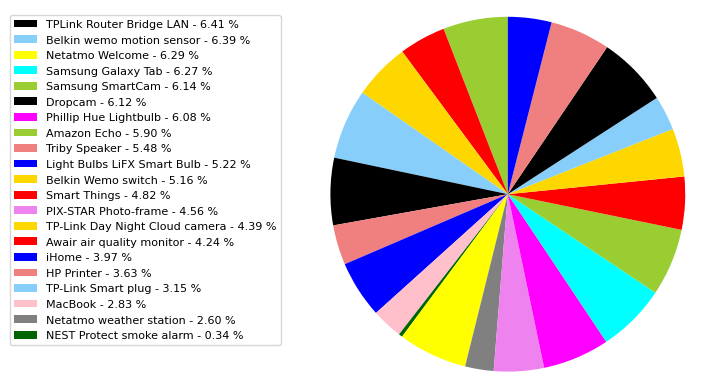

**********************************************************************************************************************************






./small/DI-S1.csv
{'Amazon Echo': 4565, 'Awair air quality monitor': 3550, 'Belkin Wemo switch': 4447, 'Belkin wemo motion sensor': 4623, 'Dropcam': 4790, 'HP Printer': 4295, 'Light Bulbs LiFX Smart Bulb': 3115, 'MacBook': 4870, 'NEST Protect smoke alarm': 213, 'Netatmo Welcome': 4221, 'Netatmo weather station': 3653, 'PIX-STAR Photo-frame': 3703, 'Phillip Hue Lightbulb': 4551, 'Samsung Galaxy Tab': 3791, 'Samsung SmartCam': 4634, 'Smart Things': 3663, 'TP-Link Day Night Cloud camera': 3418, 'TP-Link Smart plug': 2051, 'TPLink Router Bridge LAN': 4679, 'Triby Speaker': 2427, 'iHome': 3151}


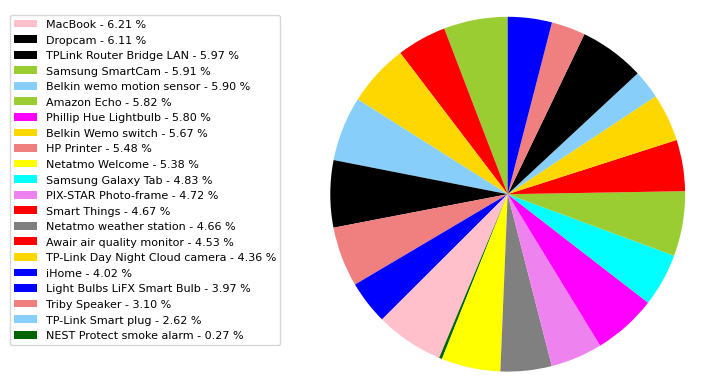

**********************************************************************************************************************************






./small/AD-S1.csv
{'Amazon Echo': 4569, 'Awair air quality monitor': 3288, 'Belkin Wemo switch': 3999, 'Belkin wemo motion sensor': 4954, 'Dropcam': 4742, 'HP Printer': 2816, 'Light Bulbs LiFX Smart Bulb': 4043, 'MacBook': 2189, 'NEST Protect smoke alarm': 262, 'Netatmo Welcome': 4876, 'Netatmo weather station': 2014, 'PIX-STAR Photo-frame': 3533, 'Phillip Hue Lightbulb': 4710, 'Samsung Galaxy Tab': 4860, 'Samsung SmartCam': 4756, 'Smart Things': 3734, 'TP-Link Day Night Cloud camera': 3401, 'TP-Link Smart plug': 2437, 'TPLink Router Bridge LAN': 4970, 'Triby Speaker': 4246, 'iHome': 3077}


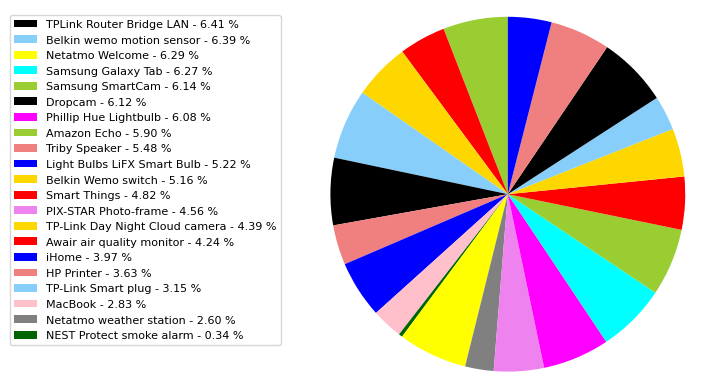

**********************************************************************************************************************************






./small/DI-S2.csv
{'Amazon Echo': 4592, 'Awair air quality monitor': 3671, 'Belkin Wemo switch': 4486, 'Belkin wemo motion sensor': 4796, 'Dropcam': 4905, 'HP Printer': 4220, 'Light Bulbs LiFX Smart Bulb': 3703, 'MacBook': 4788, 'NEST Protect smoke alarm': 351, 'Netatmo Welcome': 4611, 'Netatmo weather station': 3776, 'PIX-STAR Photo-frame': 1755, 'Phillip Hue Lightbulb': 4295, 'Samsung Galaxy Tab': 4968, 'Samsung SmartCam': 4659, 'Smart Things': 4140, 'TP-Link Day Night Cloud camera': 2761, 'TP-Link Smart plug': 2578, 'TPLink Router Bridge LAN': 4675, 'Triby Speaker': 2332, 'iHome': 2508}


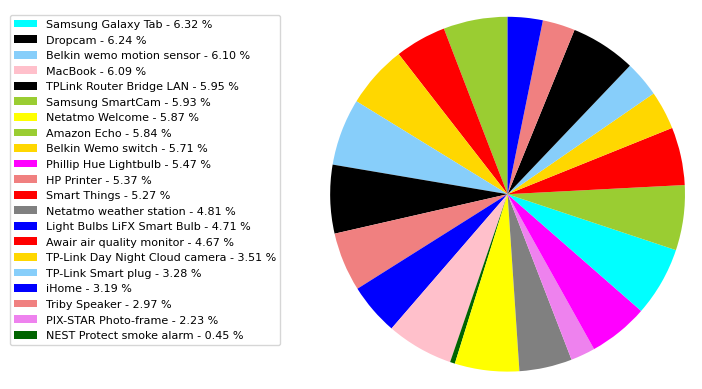

**********************************************************************************************************************************






./small/AD-S2.csv
{'Amazon Echo': 4285, 'Awair air quality monitor': 3368, 'Belkin Wemo switch': 3561, 'Belkin wemo motion sensor': 4882, 'Dropcam': 4769, 'HP Printer': 2717, 'Light Bulbs LiFX Smart Bulb': 3228, 'MacBook': 2985, 'NEST Protect smoke alarm': 410, 'Netatmo Welcome': 3960, 'Netatmo weather station': 2024, 'PIX-STAR Photo-frame': 3530, 'Phillip Hue Lightbulb': 4777, 'Samsung Galaxy Tab': 4735, 'Samsung SmartCam': 4820, 'Smart Things': 3857, 'TP-Link Day Night Cloud camera': 3601, 'TP-Link Smart plug': 2412, 'TPLink Router Bridge LAN': 4964, 'Triby Speaker': 2703, 'iHome': 3055}


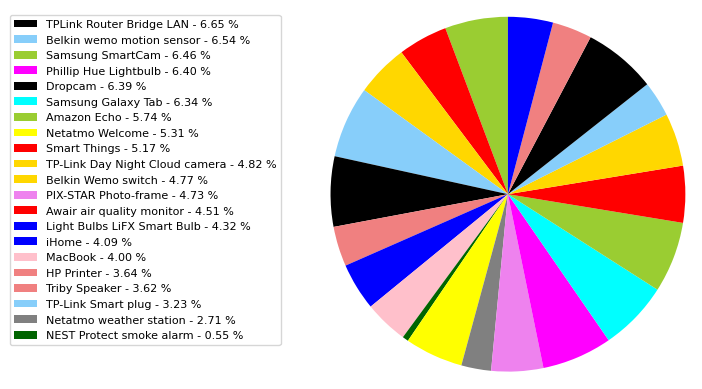

**********************************************************************************************************************************






./small/DI-S2.csv
{'Amazon Echo': 4592, 'Awair air quality monitor': 3671, 'Belkin Wemo switch': 4486, 'Belkin wemo motion sensor': 4796, 'Dropcam': 4905, 'HP Printer': 4220, 'Light Bulbs LiFX Smart Bulb': 3703, 'MacBook': 4788, 'NEST Protect smoke alarm': 351, 'Netatmo Welcome': 4611, 'Netatmo weather station': 3776, 'PIX-STAR Photo-frame': 1755, 'Phillip Hue Lightbulb': 4295, 'Samsung Galaxy Tab': 4968, 'Samsung SmartCam': 4659, 'Smart Things': 4140, 'TP-Link Day Night Cloud camera': 2761, 'TP-Link Smart plug': 2578, 'TPLink Router Bridge LAN': 4675, 'Triby Speaker': 2332, 'iHome': 2508}


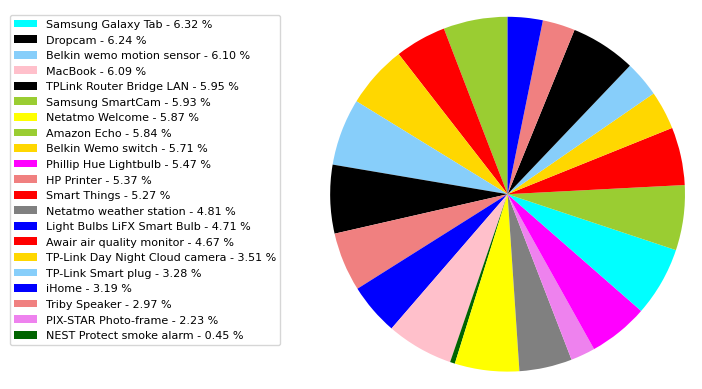

**********************************************************************************************************************************






./small/AD-S2.csv
{'Amazon Echo': 4285, 'Awair air quality monitor': 3368, 'Belkin Wemo switch': 3561, 'Belkin wemo motion sensor': 4882, 'Dropcam': 4769, 'HP Printer': 2717, 'Light Bulbs LiFX Smart Bulb': 3228, 'MacBook': 2985, 'NEST Protect smoke alarm': 410, 'Netatmo Welcome': 3960, 'Netatmo weather station': 2024, 'PIX-STAR Photo-frame': 3530, 'Phillip Hue Lightbulb': 4777, 'Samsung Galaxy Tab': 4735, 'Samsung SmartCam': 4820, 'Smart Things': 3857, 'TP-Link Day Night Cloud camera': 3601, 'TP-Link Smart plug': 2412, 'TPLink Router Bridge LAN': 4964, 'Triby Speaker': 2703, 'iHome': 3055}


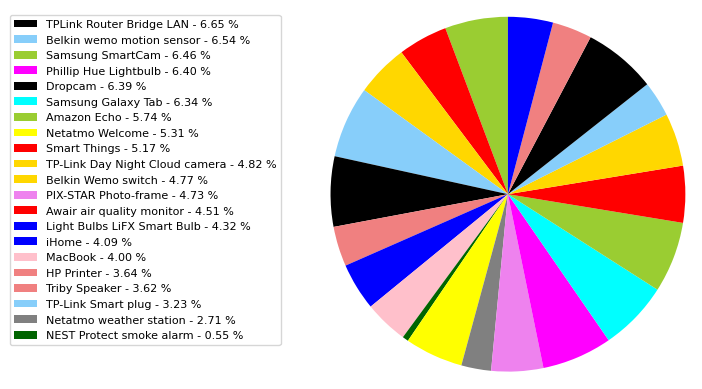

**********************************************************************************************************************************






./small/DI-S1.csv
{'Amazon Echo': 4565, 'Awair air quality monitor': 3550, 'Belkin Wemo switch': 4447, 'Belkin wemo motion sensor': 4623, 'Dropcam': 4790, 'HP Printer': 4295, 'Light Bulbs LiFX Smart Bulb': 3115, 'MacBook': 4870, 'NEST Protect smoke alarm': 213, 'Netatmo Welcome': 4221, 'Netatmo weather station': 3653, 'PIX-STAR Photo-frame': 3703, 'Phillip Hue Lightbulb': 4551, 'Samsung Galaxy Tab': 3791, 'Samsung SmartCam': 4634, 'Smart Things': 3663, 'TP-Link Day Night Cloud camera': 3418, 'TP-Link Smart plug': 2051, 'TPLink Router Bridge LAN': 4679, 'Triby Speaker': 2427, 'iHome': 3151}


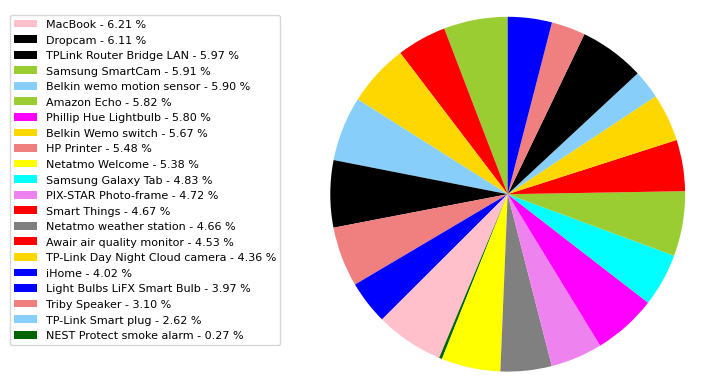

**********************************************************************************************************************************








In [12]:
for i in file_list:
    print(file_list[i][0])
    makePie(file_list[i][0])
    print("*"*130)
    print("\n"*5)

In [13]:
from  ML_initial_test import ML

fold=1
#df=ML(GA_input_features,train,vali,test,fold)

In [14]:
from  ML_initial_test import ML
#ml_list={"BaggingClassifier":BaggingClassifier()}
ml_list={"DecisionTreeClassifier":DecisionTreeClassifier()}

fold=10
df=ML(GA_input_features,train,vali,test,fold,ml_list)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.67s/it]

    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.8495     0.6534      0.0087       0.867     0.6647      0.0004        3.6689


In [15]:
with open(pickle_name, 'rb') as handle:
    GA_input_features = pickle.load(handle)

In [16]:
def FeatureMaker(f):
    selected=[]
    for i,ii in enumerate(f):
        if ii:
            selected.append(GA_input_features[i])
    return selected

In [17]:
def ReadCSV(features,train,vali,test):
    df = pd.read_csv(train,usecols=features)#,header=None )
    X_train =df[df.columns[0:-1]]
    #X_train=np.array(X_train)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_train=df[df.columns[-1]].cat.codes  
    
    df = pd.read_csv(vali,usecols=features)#,header=None )
    X_vali =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_vali=df[df.columns[-1]].cat.codes  
    
    df = pd.read_csv(test,usecols=features)#,header=None )
    X_test =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_test=df[df.columns[-1]].cat.codes  
    return X_train, y_train,  X_vali, y_vali, X_test, y_test

In [18]:
model=DecisionTreeClassifier()

In [19]:
#defining various steps required for the genetic algorithm
# GA adapted from https://datascienceplus.com/genetic-algorithm-in-machine-learning-using-python/
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool_)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        model.fit(X_train.iloc[:,chromosome],y_train)
        predictions = model.predict(X_test.iloc[:,chromosome])
        scores.append(sklearn.metrics.f1_score(y_test,predictions,average= "macro"))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        second=time.time()
        scores, pop_after_fit = fitness_score(population_nextgen)
        #print(scores[:2])
        zaman=time.time()-second
        print ('%-30s %-30s %-30s' % (np.mean(scores),np.std(scores),zaman))

        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [20]:
final_features=[]

for i in file_list:
    print(file_list[i][0],file_list[i][1])
    features=GA_input_features
    train=file_list[i][0]
    vali=file_list[i][1]
    test=file_list[i][2]
    X_train, y_train, X_test, y_test, X_final, y_final=ReadCSV(features,train,vali,test)
    fold=10
    print("Before GA")
    df=ML(GA_input_features,train,vali,test,fold,ml_list)
    
    print ('\n\n%-30s %-30s %-30s' % ("MEAN","STD","TIME"))
    chromo,score=generations(size=200,n_feat=X_train.shape[1],n_parents=120,mutation_rate=0.05,
                         n_gen=25,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
    print("\n\nAfter GA")
    selected=FeatureMaker(chromo[-1])
    df=ML(selected,train,vali,test,fold,ml_list)
    print("\n","*"*140,"\n\n\n\n\n")
    final_features.append(selected)

Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.61s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.8495     0.6613      0.0067       0.867     0.6652      0.0006        3.6052


MEAN                           STD                            TIME                          
0.6532694714419176             0.0161702677118772             48.23262977600098             
0.6536760822320115             0.019840675130700165           54.51361393928528             
0.6567477141133103             0.022943172155057708           52.13789892196655             
0.6532423039403709             0.03701683322112736            48.54397368431091             
0.6608686240217757             0.011480482200606757           46.513657331466675            
0.6568764464437931             0.03362251767704163            46.81059765815735             
0.663068151670

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.21s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.8495     0.6666           0      0.8671     0.6666           0        2.2066

 ******************************************************************************************************************************************** 





Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.51s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.8092      0.662      0.0028      0.9993     0.9965      0.0031        3.5102


MEAN                           STD                            TIME                          
0.6586738710287063             0.01809743713415965            47.243448972702026            
0.6601038961725325             0.017969761780512114           51.89613890647888             
0.6573489085410273             0.03534020329251246            53.192033529281616            
0.6614277894113394             0.02261446776232337            53.45473051071167             
0.6658799085617402             0.008991050107182527           48.74539756774902             
0.6659034632193903             0.015640813415058564           48.00190353393555             
0.663852545187

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.02s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9992     0.9913      0.0028      0.9991     0.9971           0        2.0234

 ******************************************************************************************************************************************** 





Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.71s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.8671     0.6655      0.0006      0.8495     0.6597      0.0081        3.6992


MEAN                           STD                            TIME                          
0.6612471772614257             0.021943718326645063           49.072601079940796            
0.6627666066175412             0.01890506659012454            55.01632022857666             
0.663229836346011              0.018718139468125596           50.535757064819336            
0.6628826941479029             0.017993599249188544           45.52136421203613             
0.6608994651604458             0.026118161542218625           47.630985498428345            
0.6626077137637627             0.023927784238786616           47.25453853607178             
0.661615383009

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.95s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9998     0.9986           0           1     0.9999           0        1.9515

 ******************************************************************************************************************************************** 





Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.86s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.8092     0.6637      0.0022      0.9995     0.9955      0.0029        3.8588


MEAN                           STD                            TIME                          
0.6511941035760642             0.029657385574791945           49.68224000930786             
0.6540899223545542             0.03398791807665656            56.36884617805481             
0.6480409306042799             0.03835981065581452            55.19359040260315             
0.6548080078537564             0.02669909475262581            59.74053692817688             
0.6503024787774706             0.035500151282105964           56.608654737472534            
0.6541377047874446             0.03390894091346042            50.66954183578491             
0.652329043557

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.99s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.8413     0.3695      0.0008      0.8983     0.4918      0.0006        3.9851

 ******************************************************************************************************************************************** 





Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.94s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9997      0.906      0.0247      0.9997     0.8995      0.0292        5.9384


MEAN                           STD                            TIME                          
0.9153588075494048             0.06335729821675284            52.822080850601196            
0.930412302405095              0.07773869874491177            51.62980008125305             
0.9419876887894001             0.08039995924142665            49.375253677368164            
0.9664525201181395             0.07350685631501598            47.31097722053528             
0.9813417520145855             0.036302406632115904           47.69478702545166             
0.9712782972495229             0.06532963994303331            45.5127854347229              
0.974203325856

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.45s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9998     0.9149      0.0017      0.9997     0.9133      0.0027        2.4507

 ******************************************************************************************************************************************** 





Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.80s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9992     0.9863      0.0241      0.8088     0.6541      0.0235        3.7941


MEAN                           STD                            TIME                          
0.9750532703487127             0.06614467775274588            50.27035474777222             
0.981784474470535              0.058398441812690605           56.69779348373413             
0.9772186186302563             0.06522285491707679            54.14352488517761             
0.9699661702072606             0.07151242260728098            52.828656911849976            
0.9830812710704316             0.05208057021398048            50.45555925369263             
0.9723808809638667             0.07450643425441424            49.04148840904236             
0.979549783931

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.80s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9996     0.9987      0.0004      0.9965     0.9793      0.0007        2.7964

 ******************************************************************************************************************************************** 





Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.74s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9997     0.8955      0.0229      0.9998     0.9067       0.025        3.7424


MEAN                           STD                            TIME                          
0.8991400272339325             0.0659772233064867             48.948506593704224            
0.9280555034625627             0.05550505924519939            53.82236933708191             
0.9469513188728094             0.06069841895382023            51.14557647705078             
0.9606854380313007             0.06695809095528557            50.11477875709534             
0.966973749486712              0.05417923875317189            47.9514365196228              
0.9426149898740452             0.10763809128289546            47.08735156059265             
0.949064549132

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.32s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier       0.997     0.8503      0.0006      0.9997     0.9128      0.0007         2.317

 ******************************************************************************************************************************************** 





Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.42s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9993     0.9965      0.0037      0.8092      0.662      0.0036        3.4145


MEAN                           STD                            TIME                          
0.9761280796190249             0.07347990970697917            47.557759284973145            
0.9883297203822136             0.04814426804076335            54.24422073364258             
0.9891435566059081             0.043227821331149836           52.30558443069458             
0.9853919839284572             0.07100116857903135            50.974111557006836            
0.9802837454532678             0.07304869959932661            49.402992725372314            
0.9859017543675492             0.057925960181580916           47.59217309951782             
0.971309826262

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.19s/it]

    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9994     0.9981      0.0013      0.8093     0.6632      0.0021        2.1912

 ******************************************************************************************************************************************** 







In [ ]:
0.6532694714419176             0.0161702677118772             48.23262977600098             
0.6536760822320115             0.019840675130700165           54.51361393928528             
0.6567477141133103             0.022943172155057708           52.13789892196655             
0.6532423039403709             0.03701683322112736            48.54397368431091             
0.6608686240217757             0.011480482200606757           46.513657331466675            
0.6568764464437931             0.03362251767704163            46.81059765815735             
0.66306815167049               0.007974956371251833           44.54925060272217             
0.657175149659086              0.03059267855718207            44.51594614982605             
0.6601970047206412             0.019186295104460398           45.43693470954895             
0.6506483288861605             0.04404582362985013            44.948864698410034            
0.6556398252132519             0.03386692224423618            43.57599425315857             
0.6581914464279056             0.025133571055078897           43.23679733276367             
0.6583005138222383             0.02955105106509639            42.495079040527344            
0.6575439080937794             0.02844671573169497            43.69759964942932             
0.6629554170512705             0.013949715901608704           41.86659121513367             
0.6575201955708244             0.03963702238989034            42.59518647193909             
0.6576348269328156             0.02679117086295819            41.722113609313965            
0.6485223641652379             0.04686251878065899            42.02028441429138             
0.6614090428744182             0.024139710382626484           41.998143672943115            
0.6597240609216405             0.023797458137597878           41.8083815574646              
0.6545166554618888             0.04090314545726555            42.41083765029907 

In [21]:
for i in final_features:
    print(len(i))

25
20
23
17
26
27
24
24


In [22]:
# Listeleri tanımla
liste1 = final_features[0]
liste2 = final_features[1]
liste3 = final_features[2]
liste4 = final_features[3]
liste5 = final_features[4]
liste6 = final_features[5]
liste7 = final_features[6]
liste8 = final_features[7]
# Listeleri kümeye çevir
kume1 = set(liste1)
kume2 = set(liste2)
kume3 = set(liste3)
kume4 = set(liste4)
kume5 = set(liste5)
kume6 = set(liste6)
kume7 = set(liste7)
kume8 = set(liste8)



# Kümelerin kesişimini bul
kesisim = kume1.intersection(kume2, kume3, kume4,kume5, kume6, kume7,kume8)

# Kesişim elemanlarını yazdır
print("Kesişim:", kesisim)

Kesişim: {'tcp.flags', 'tcp.window_size', 'http.chat'}


In [25]:
final_features

[['dstport_class',
  'http.chat',
  'http.notification',
  'http.request.method',
  'ip.flags.df',
  'ip.proto',
  'srcport',
  'srcport_class',
  'tcp.ack',
  'tcp.analysis.ack_rtt',
  'tcp.analysis.bytes_in_flight',
  'tcp.flags',
  'tcp.flags.push',
  'tcp.flags.str',
  'tcp.flags.syn',
  'tcp.len',
  'tcp.nxtseq',
  'tcp.srcport',
  'tcp.stream',
  'tcp.time_delta',
  'tcp.window_size',
  'tcp.window_size_scalefactor',
  'udp.checksum.status',
  'udp.srcport',
  'udp.time_relative'],
 ['dstport',
  'dstport_class',
  'http.chat',
  'http.request.method',
  'ip.proto',
  'tcp.ack',
  'tcp.analysis.push_bytes_sent',
  'tcp.completeness',
  'tcp.dstport',
  'tcp.flags',
  'tcp.flags.push',
  'tcp.hdr_len',
  'tcp.nxtseq',
  'tcp.srcport',
  'tcp.stream',
  'tcp.window_size',
  'tcp.window_size_scalefactor',
  'udp.checksum.status',
  'udp.srcport',
  'udp.time_relative'],
 ['dstport_class',
  'http.chat',
  'http.notification',
  'http.request.method',
  'ip.flags.df',
  'ip.len',
  '

In [24]:
all_features)

8

In [26]:
graph=[GA_input_features]


for i in final_features:
    temp=[]
    for ii in GA_input_features:
        if ii in i:
            temp.append(1)
        else:
            temp.append(0)
    graph.append(temp)
        

In [28]:
graph = pd.DataFrame (graph[1:], columns = graph[0])
graph

,dstport,dstport_class,http.chat,http.notification,http.request.method,ip.flags,ip.flags.df,ip.len,ip.opt.type,ip.proto,...,tcp.window_size_scalefactor,tcp.window_size_value,tls.record.length,udp.checksum.status,udp.dstport,udp.length,udp.srcport,udp.time_delta,udp.time_relative,_ws.col.Protocol
0,0,1,1,1,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0
1,1,1,1,0,1,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
2,0,1,1,1,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,1,1,0,1,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,1,0,...,1,1,1,0,0,1,1,1,1,0
5,0,1,1,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
6,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,1,1,0
7,1,0,0,0,1,1,1,1,0,1,...,0,1,1,0,0,1,1,1,0,0


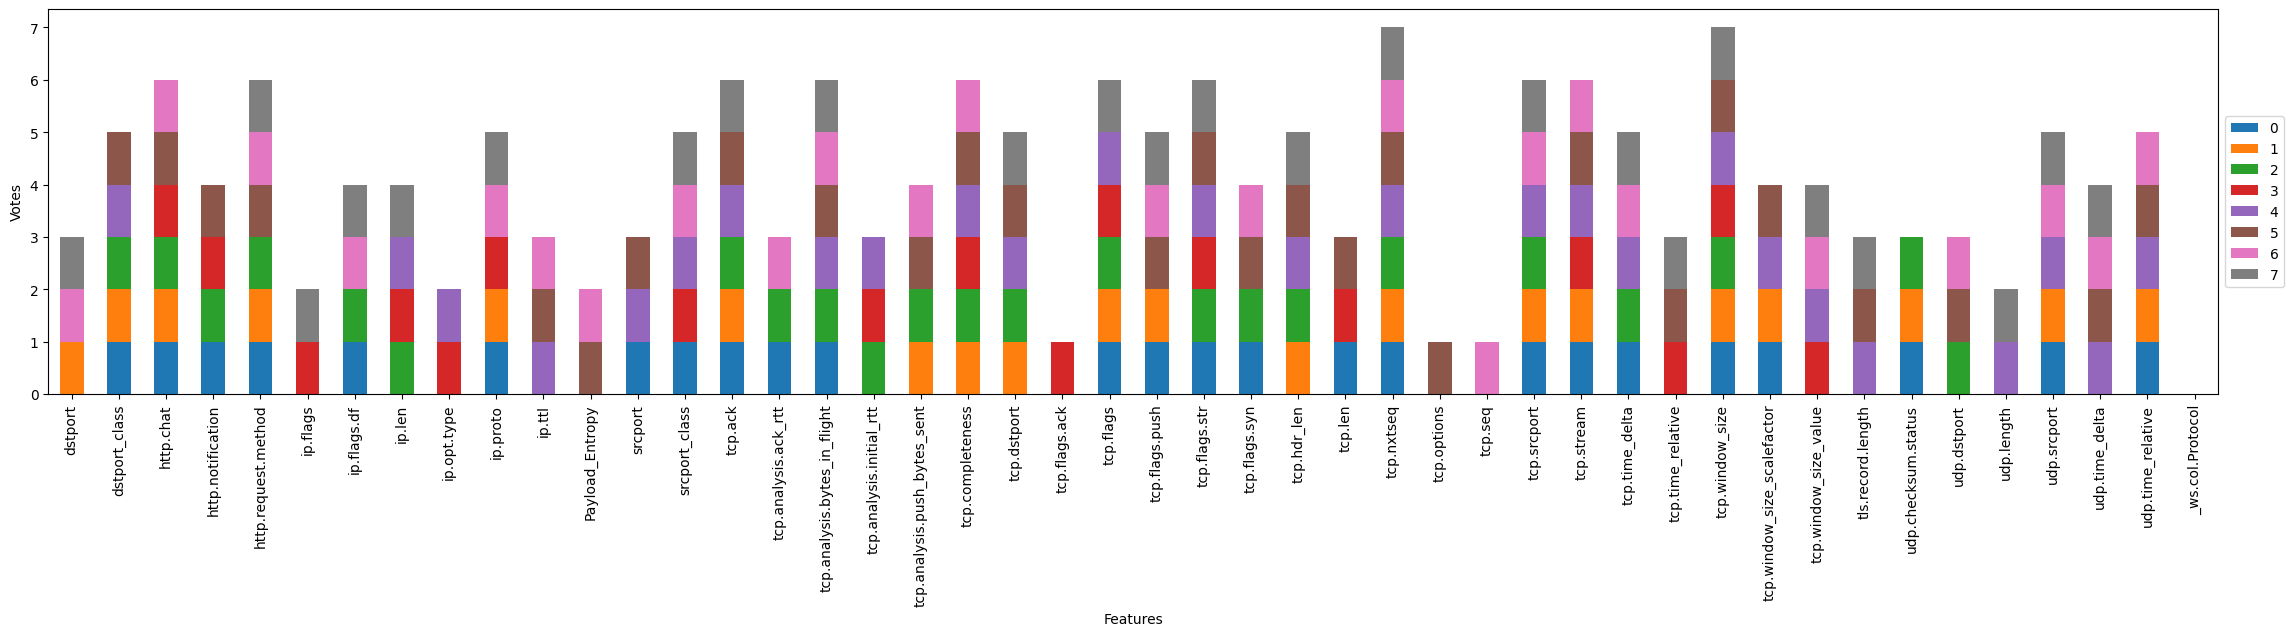

In [32]:
df=graph.T
df.plot.bar(stacked=True,figsize=(28,5))#,color=list(colors.values()))
plt.xlabel('Features')
plt.ylabel('Votes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("grf.pdf",bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()

In [37]:
selected_features_2=[]
selected_features_3=[]
selected_features_4=[]
selected_features_5=[]
selected_features_6=[]
selected_features_7=[]
selected_features_8=[]
for ii,i in enumerate(df.values):
    if sum(i)>=2:
        selected_features_2.append(df.index[ii])
    if sum(i)>=3:
        selected_features_3.append(df.index[ii])
    if sum(i)>=4:
        selected_features_4.append(df.index[ii])
    if sum(i)>=5:
        selected_features_5.append(df.index[ii])
    if sum(i)>=6:
        selected_features_6.append(df.index[ii])
    if sum(i)>=7:
        selected_features_2.append(df.index[ii])
    if sum(i)>=8:
        selected_features_2.append(df.index[ii])
    if sum(i)>=2:
        selected_features_2.append(df.index[ii])
    if sum(i)>=2:
        selected_features_2.append(df.index[ii])



In [41]:
fdict={}
for i in range(2,9):
    fdict[i]=[]
    

In [42]:
fdict

{2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}

In [51]:

for ii,i in enumerate(df.values):
    temp=sum(i)
    for j in range(temp,0,-1):
        try:
           fdict[j].append(df.index[ii])
        except:pass
        
    

In [52]:
fdict

{2: ['dstport',
  'dstport',
  'dstport_class',
  'http.chat',
  'http.notification',
  'http.request.method',
  'ip.flags',
  'ip.flags.df',
  'ip.len',
  'ip.opt.type',
  'ip.proto',
  'ip.ttl',
  'Payload_Entropy',
  'srcport',
  'srcport_class',
  'tcp.ack',
  'tcp.analysis.ack_rtt',
  'tcp.analysis.bytes_in_flight',
  'tcp.analysis.initial_rtt',
  'tcp.analysis.push_bytes_sent',
  'tcp.completeness',
  'tcp.dstport',
  'tcp.flags',
  'tcp.flags.push',
  'tcp.flags.str',
  'tcp.flags.syn',
  'tcp.hdr_len',
  'tcp.len',
  'tcp.nxtseq',
  'tcp.srcport',
  'tcp.stream',
  'tcp.time_delta',
  'tcp.time_relative',
  'tcp.window_size',
  'tcp.window_size_scalefactor',
  'tcp.window_size_value',
  'tls.record.length',
  'udp.checksum.status',
  'udp.dstport',
  'udp.length',
  'udp.srcport',
  'udp.time_delta',
  'udp.time_relative'],
 3: ['dstport',
  'dstport',
  'dstport_class',
  'http.chat',
  'http.notification',
  'http.request.method',
  'ip.flags.df',
  'ip.len',
  'ip.proto',
  